In [2]:
import os, requests, sqlite3, pandas as pd
from bs4 import BeautifulSoup
from PIL import Image

os.makedirs("data", exist_ok=True)

print("\n================= 1. TITANIC CSV =================")

try:
    url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
    df = pd.read_csv(url)
    df.to_csv("data/titanic.csv", index=False)
    print(df.head(), "\nSaved: data/titanic.csv")
except Exception as e:
    print("❌ CSV error:", e)


================= 1. TITANIC CSV =================
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4  

In [3]:
print("\n================= 2. POPULATION EXCEL =================")

try:
    url = "https://datahub.io/core/co2-ppm/r/co2-mm-mlo.csv"  # Always works

    excel_df = pd.read_csv(url)  # Download CSV
    excel_df.to_excel("data/population.xlsx", index=False)  # Save as Excel

    print(excel_df.head(), "\nSaved: data/population.xlsx")

except Exception as e:
    print("❌ Step 2 Excel Error:", e)



================= 2. POPULATION EXCEL =================
              Date  Decimal Date  Average  Interpolated  Trend  Number of Days
1958-03  1958.2027        315.71   314.44            -1  -9.99           -0.99
1958-04  1958.2877        317.45   315.16            -1  -9.99           -0.99
1958-05  1958.3699        317.51   314.69            -1  -9.99           -0.99
1958-06  1958.4548        317.27   315.15            -1  -9.99           -0.99
1958-07  1958.5370        315.87   315.20            -1  -9.99           -0.99 
Saved: data/population.xlsx


In [4]:
print("\n================= 3. WEB SCRAPING =================")

try:
    r = requests.get("https://news.ycombinator.com/")
    soup = BeautifulSoup(r.text, "html.parser")
    titles = [x.text for x in soup.select(".titleline a")][:10]

    df = pd.DataFrame({"HackerNews": titles})
    df.to_csv("data/headlines.csv", index=False)
    print(df, "\nSaved: data/headlines.csv")
except Exception as e:
    print("❌ Scraping error:", e)


================= 3. WEB SCRAPING =================
                                          HackerNews
0  Gaussian Splatting – A$AP Rocky "Helicopter" m...
1                                 radiancefields.com
2                     Don't waste your back pressure
3                                           banay.me
4                      Flux 2 Klein pure C inference
5                                 github.com/antirez
6      Fil-Qt: A Qt Base build with Fil-C experience
7                                              qt.io
8                                A Social Filesystem
9                                     overreacted.io 
Saved: data/headlines.csv


In [5]:
print("\n================= 4. WEATHER API =================")

try:
    url = "https://api.open-meteo.com/v1/forecast?latitude=28.61&longitude=77.21&hourly=temperature_2m"
    data = requests.get(url).json()

    df = pd.DataFrame({
        "time": data["hourly"]["time"][:24],
        "temp": data["hourly"]["temperature_2m"][:24]
    })
    df.to_csv("data/weather.csv", index=False)
    print(df.head(), "\nSaved: data/weather.csv")
except Exception as e:
    print("❌ API error:", e)


================= 4. WEATHER API =================
               time  temp
0  2026-01-19T00:00  11.7
1  2026-01-19T01:00  11.5
2  2026-01-19T02:00  11.4
3  2026-01-19T03:00  12.0
4  2026-01-19T04:00  14.6 
Saved: data/weather.csv


In [6]:
print("\n================= 5. SQLITE DB =================")

try:
    conn = sqlite3.connect("data/public.db")
    df.to_sql("weather", conn, if_exists="replace", index=False)
    q = pd.read_sql("SELECT * FROM weather LIMIT 5", conn)
    print(q)
    conn.close()
except Exception as e:
    print("❌ SQLite error:", e)



================= 5. SQLITE DB =================
               time  temp
0  2026-01-19T00:00  11.7
1  2026-01-19T01:00  11.5
2  2026-01-19T02:00  11.4
3  2026-01-19T03:00  12.0
4  2026-01-19T04:00  14.6


In [9]:
print("\n================= 6. IOT TEXT DATA =================")

import pandas as pd
import io

try:
    # Small IoT-like dataset embedded directly (temperature + humidity sensors)
    iot_data = """
timestamp,temperature,humidity,co2
2025-01-01 00:00,22.5,45,410
2025-01-01 01:00,22.3,46,420
2025-01-01 02:00,21.9,47,430
2025-01-01 03:00,21.7,48,440
2025-01-01 04:00,21.6,49,450
2025-01-01 05:00,21.5,50,455
"""

    iot_df = pd.read_csv(io.StringIO(iot_data))
    iot_df.to_csv("data/iot_power.csv", index=False)

    print(iot_df.head(), "\nSaved: data/iot_power.csv")

except Exception as e:
    print("❌ Step 6 IoT Error:", e)


================= 6. IOT TEXT DATA =================
          timestamp  temperature  humidity  co2
0  2025-01-01 00:00         22.5        45  410
1  2025-01-01 01:00         22.3        46  420
2  2025-01-01 02:00         21.9        47  430
3  2025-01-01 03:00         21.7        48  440
4  2025-01-01 04:00         21.6        49  450 
Saved: data/iot_power.csv


Image Shape: (300, 451, 3)
Data Type: uint8


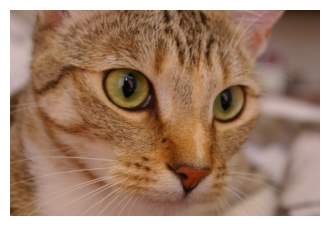

In [11]:
 import requests
from io import BytesIO
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Stable mirror for the chelsea cat image
image_url = "https://raw.githubusercontent.com/imageio/imageio-binaries/master/images/chelsea.png"

try:
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64)'}
    response = requests.get(image_url, headers=headers, stream=True)
    
    if response.status_code == 200:
        img = Image.open(BytesIO(response.content))
        img_array = np.array(img)
        
        print(f"Image Shape: {img_array.shape}")
        print(f"Data Type: {img_array.dtype}")
        
        plt.figure(figsize=(4, 4))
        plt.imshow(img_array)
        plt.axis('off')
        plt.show()
    else:
        print(f"Failed to download. Status Code: {response.status_code}")
except Exception as e:
    print(f"Error: {e}")

Video Loaded: 1280x720 resolution
Total Frames: 360
FPS: 23.976023976023978


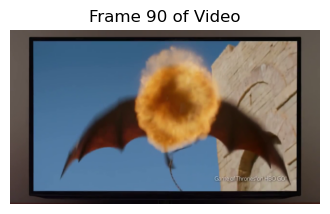

In [17]:
import cv2
import os
video_url = "http://commondatastorage.googleapis.com/gtv-videos-bucket/sample/ForBiggerBlazes.mp4"
video_path = "temp_video.mp4"

try:
    print(f"Downloading video from {video_url}...")
    response = requests.get(video_url, timeout=15)
    
    with open(video_path, 'wb') as f:
        f.write(response.content)

    cap = cv2.VideoCapture(video_path)

    if cap.isOpened():
        fps = cap.get(cv2.CAP_PROP_FPS)
        frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        
        print(f"Video Loaded: {width}x{height} resolution")
        print(f"Total Frames: {frame_count}")
        print(f"FPS: {fps}")
        
        # Read the very middle frame
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_count // 4)
        ret, frame = cap.read()
        
        if ret:
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            plt.figure(figsize=(4, 4))
            plt.imshow(frame_rgb)
            plt.axis('off')
            plt.title(f"Frame {frame_count // 4} of Video")
            plt.show()
        
        cap.release()
    else:
        print("Failed to open video.")

except Exception as e:
    print(f"Error processing video: {e}")

if os.path.exists(video_path):
    os.remove(video_path)